In [8]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [9]:
df = pd.read_csv('processed_segments_overlap.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,8.762772,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10977,1.0,2.849106,4.156342,11.540054,1.398209,-1.881836,2.207458,12.061981,25.627533,17.559082,...,-3.002335,-3.002335,10.764328,19.019547,19.871872,6.004654,9.461884,15.811310,22.572540,20.719421
10978,1.0,0.009583,9.605545,12.990936,20.561401,15.883133,11.774689,13.302185,10.544067,17.769760,...,60.429657,60.429657,25.072083,9.495407,9.495407,-14.068329,-19.512741,-11.065994,2.049438,10.376465
10979,1.0,7.910446,0.928955,-0.574615,-0.574615,1.824387,0.258575,2.590530,2.590530,12.804184,...,5.104431,0.574615,0.574615,9.016571,19.579788,11.305420,-5.975922,-5.975922,-22.026657,-15.983688
10980,1.0,13.273453,18.440140,15.078690,14.274231,9.117126,11.444290,2.896988,2.896988,-5.607223,...,17.372330,11.903976,2.710236,5.200211,11.745956,5.736511,5.736511,10.702087,2.834732,2.834732


In [10]:
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()

curb_scene
0.0    10608
1.0      374
Name: count, dtype: int64

In [11]:
#spilt data using sklearn, train data with label now to spilt later
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], test_size=0.2, random_state=111)
train_data

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
1267,0.0,5.755661,11.209656,11.094727,10.026917,7.728485,13.546387,20.058624,17.190369,4.826706,...,10.093948,4.161118,6.397308,10.994171,11.578354,10.740387,13.287827,9.725250,12.253525,10.955872
9829,0.0,11.908752,9.892838,5.712570,1.398209,10.328583,17.712310,12.947845,1.982407,-1.934509,...,5.286392,8.724472,11.267120,15.452179,4.036621,6.545746,8.916000,12.545624,15.447388,7.522583
5556,0.0,9.706100,1.029510,1.489197,10.620682,18.401840,12.785034,4.079727,3.754105,15.945389,...,12.732361,12.401962,4.817139,7.350205,11.745956,13.469772,12.411545,5.003876,7.560883,13.469772
7810,0.0,6.766022,10.362106,13.239929,14.417877,14.039597,9.198517,11.401184,8.432373,11.841721,...,10.074799,5.798752,6.090851,6.449982,7.316681,15.710754,13.972565,11.779480,4.572922,5.832275
2063,0.0,8.710114,8.695740,8.657440,8.623917,8.633499,8.690948,8.705322,8.686157,8.772354,...,8.734055,8.652649,8.604767,8.599976,8.695740,8.772354,8.781937,8.734055,8.695740,8.729263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,0.0,8.638275,8.489838,8.595184,8.844177,8.863342,8.633499,8.480270,8.465897,8.599976,...,8.628708,8.614334,8.609543,8.623917,8.643066,8.633499,8.604767,8.614334,8.614334,8.652649
7443,0.0,12.780243,10.749970,11.789047,9.064453,5.415680,4.611237,8.882492,15.073898,13.048401,...,6.076477,10.764328,6.991074,4.975159,5.573700,8.236053,11.358093,4.491516,3.605667,7.484268
4182,0.0,8.810669,8.791504,8.762772,8.781937,8.796295,8.791504,8.777145,8.777145,8.777145,...,8.791504,8.767563,8.786728,8.820236,8.829819,8.796295,8.796295,8.781937,8.796295,8.805878
4820,0.0,15.820892,8.413223,2.221817,4.874588,13.608643,15.777786,9.888046,3.548202,4.405335,...,9.284714,5.295975,3.907333,10.055649,13.939041,7.168243,5.114014,1.762131,5.707779,12.334930


In [12]:
#scaling data, becasue neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])
print(train_data_scaled.shape)
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
# Add the 'curb_scene' column back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
print(train_data_scaled_df.head())

(8785, 100)
    Acc-Z_1   Acc-Z_2   Acc-Z_3   Acc-Z_4   Acc-Z_5   Acc-Z_6   Acc-Z_7  \
0 -0.559496  0.403131  0.396273  0.172176 -0.215232  0.829138  1.929697   
1  0.530438  0.167220 -0.583509 -1.312895  0.237092  1.580394  0.697093   
2  0.140269 -1.420668 -1.352343  0.274367  1.641550  0.691841 -0.840134   
3 -0.380525  0.251290  0.786792  0.927895  0.882676  0.045071  0.428990   
4 -0.036156 -0.047243 -0.047417 -0.069292 -0.057792 -0.046461 -0.038319   

    Acc-Z_8   Acc-Z_9  Acc-Z_10  ...  Acc-Z_92  Acc-Z_93  Acc-Z_94  Acc-Z_95  \
0  1.368904 -0.675360 -1.001968  ... -0.905702 -0.478449  0.373130  0.479092   
1 -1.120103 -1.805660  0.563884  ... -0.035274  0.449771  1.178816 -0.869258   
2 -0.830139  1.183396  1.337978  ...  0.666182 -0.779641 -0.285436  0.509057   
3 -0.064471  0.497369  0.587172  ... -0.593335 -0.536862 -0.448132 -0.282832   
4 -0.022936 -0.015749 -0.023109  ... -0.048974 -0.057692 -0.059568 -0.036277   

   Acc-Z_96  Acc-Z_97  Acc-Z_98  Acc-Z_99  Acc-Z_100  cu

In [13]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].values[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].values[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].values[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].values[:, :-1]
# Debug: Print the shapes to verify the slicing
print("Normal Train Data Shape:", normal_train_data_scaled.shape)
print("Abnormal Train Data Shape:", abnormal_train_data_scaled.shape)
print("Normal Test Data Shape:", normal_test_data_scaled.shape)
print("Abnormal Test Data Shape:", abnormal_test_data_scaled.shape)

Normal Train Data Shape: (8482, 100)
Abnormal Train Data Shape: (303, 100)
Normal Test Data Shape: (2126, 100)
Abnormal Test Data Shape: (71, 100)


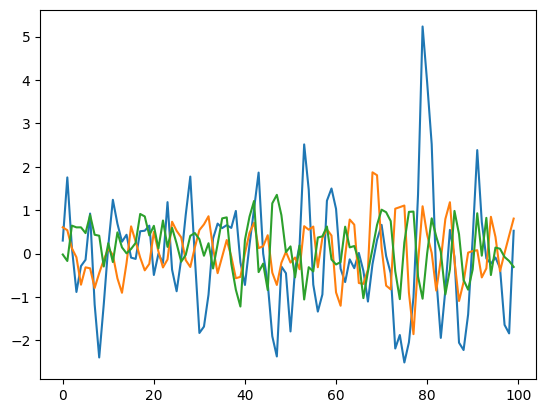

In [19]:
#See normal data 
plt.plot(normal_train_data_scaled[300])
plt.plot(normal_train_data_scaled[100])
plt.plot(normal_train_data_scaled[200])

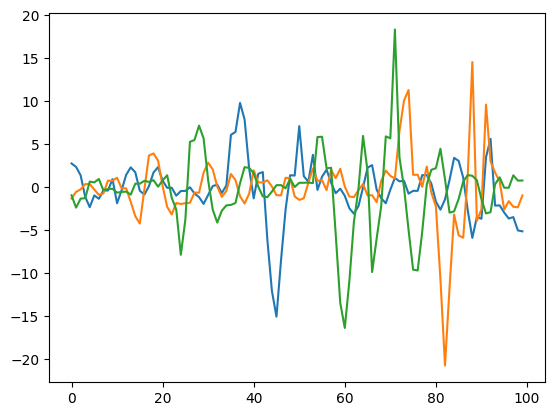

In [20]:
#see abnormal data
plt.plot(abnormal_train_data_scaled[20])
plt.plot(abnormal_train_data_scaled[30])
plt.plot(abnormal_train_data_scaled[100])


In [21]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(100, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [23]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')

In [24]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, normal_train_data_scaled,epochs=100, batch_size=128,
                    validation_data=(train_data_scaled, train_data_scaled), 
                    shuffle=True, callbacks=[early_stopping])

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.6720 - val_loss: 0.5368
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4732 - val_loss: 0.5366
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4766 - val_loss: 0.5366
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4752 - val_loss: 0.5366
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4787 - val_loss: 0.5366
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4827 - val_loss: 0.5365
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4732 - val_loss: 0.5355
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4757 - val_loss: 0.5321
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4656 - val_loss: 0.5304
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4717 - val_loss: 0.5297
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4715 - val_loss: 0.5291
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4

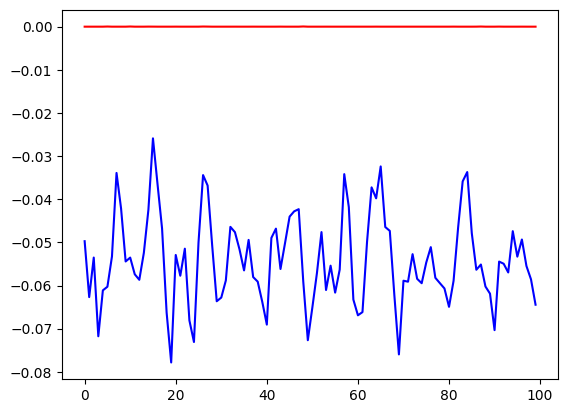

In [25]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled[0], 'blue')
plt.plot(decoder_out[0], 'red')

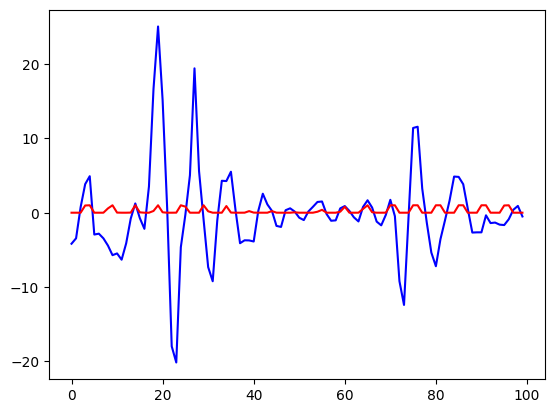

In [26]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(array([524., 121.,  31.,  13.,   8.,   7.,  11.,  36.,  71.,  96., 107.,
        119., 115., 109.,  93., 109., 111.,  94.,  83.,  67.,  37.,  35.,
         25.,  21.,  12.,   8.,  11.,   9.,   4.,   7.,   8.,   8.,   4.,
          4.,   3.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.01613137, 0.05579576, 0.09546015, 0.13512453, 0.17478892,
        0.21445331, 0.2541177 , 0.29378209, 0.33344648, 0.37311087,
        0.41277526, 0.45243965, 0.49210404, 0.53176842, 0.57143281,
        0.6110972 , 0.65076159, 0.69042598, 0.73009037, 0.76975476,
        0.80941915, 0.84908354, 0.88874793, 0.92841231, 0.9680767 ,
        1.00774109, 1.04740548, 1.08706987, 1.12673426, 1.16639865,
        1.20606304, 1.24572743, 1.28539182, 1.3250562 , 1.36472059,
        1.40438498, 1.44404937, 1.48371376, 1.52337815, 1.56304254,
        1.60270693, 1.64237132, 1.6820357 , 1.72170009, 1.76136448,
        1.80102887, 1.84069326, 1.88035765, 1.

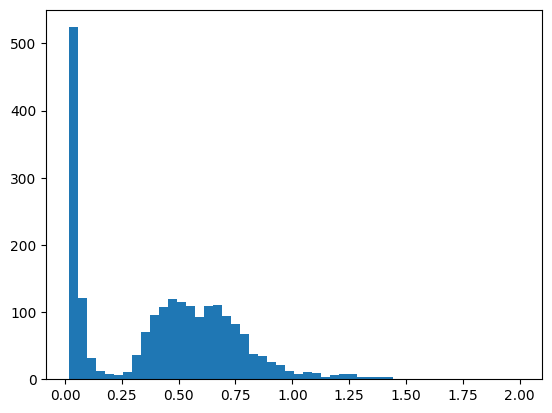

In [27]:
reconstruction = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


(array([1., 1., 0., 0., 0., 0., 2., 1., 1., 2., 1., 3., 3., 3., 1., 5., 1.,
        2., 1., 0., 0., 1., 3., 3., 1., 0., 3., 1., 3., 0., 0., 0., 0., 2.,
        2., 2., 2., 0., 4., 4., 1., 0., 1., 0., 1., 1., 2., 2., 1., 3.]),
 array([0.68395872, 0.74977194, 0.81558515, 0.88139837, 0.94721158,
        1.0130248 , 1.07883801, 1.14465123, 1.21046444, 1.27627766,
        1.34209087, 1.40790409, 1.47371731, 1.53953052, 1.60534374,
        1.67115695, 1.73697017, 1.80278338, 1.8685966 , 1.93440981,
        2.00022303, 2.06603624, 2.13184946, 2.19766268, 2.26347589,
        2.32928911, 2.39510232, 2.46091554, 2.52672875, 2.59254197,
        2.65835518, 2.7241684 , 2.78998161, 2.85579483, 2.92160804,
        2.98742126, 3.05323448, 3.11904769, 3.18486091, 3.25067412,
        3.31648734, 3.38230055, 3.44811377, 3.51392698, 3.5797402 ,
        3.64555341, 3.71136663, 3.77717984, 3.84299306, 3.90880628,
        3.97461949]),
 <BarContainer object of 50 artists>)

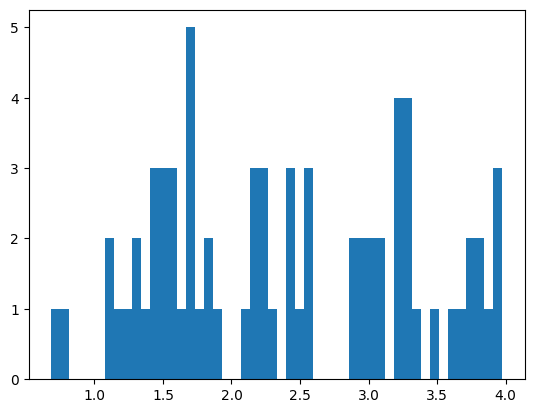

In [28]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

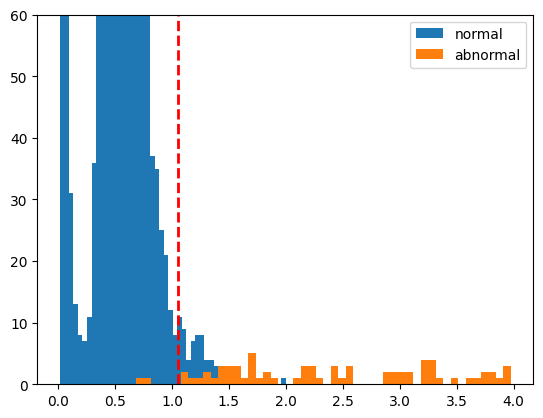

In [33]:
threadshold = 1.05
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threadshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threadshold))
plt.show()

In [34]:
preds=tf.math.less(train_loss, threadshold)
correct = tf.math.count_nonzero(preds)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds))

Correct Predictions:  2064
Accuracy:  0.9708372530573848


In [35]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threadshold)
correct = tf.math.count_nonzero(preds_abnormal)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  69
Accuracy:  0.971830985915493
